<a href="https://colab.research.google.com/github/suhaspuli24123/Real_Time_AQI/blob/main/Real_Time_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Real_time_AQI.csv"
df = pd.read_csv(dataset_path)

In [ ]:
print("================================== dataset head ====================================")
print(df.head())
print("================================== dataset tail ====================================")
print(df.tail())

================================== dataset head ====================================
  country  state      city                        station  \
0   India  Assam  Guwahati          IITG, Guwahati - PCBA   
1   India  Assam  Guwahati          IITG, Guwahati - PCBA   
2   India  Assam  Guwahati          IITG, Guwahati - PCBA   
3   India  Assam  Guwahati  LGBI Airport, Guwahati - PCBA   
4   India  Assam  Guwahati  LGBI Airport, Guwahati - PCBA   

           last_update   latitude  longitude pollutant_id  pollutant_min  \
0  05-10-2025 09:00:00  26.202864  91.700464         PM10           15.0   
1  05-10-2025 09:00:00  26.202864  91.700464          SO2           22.0   
2  05-10-2025 09:00:00  26.202864  91.700464           CO            2.0   
3  05-10-2025 09:00:00  26.108870  91.589544          SO2           11.0   
4  05-10-2025 09:00:00  26.108870  91.589544           CO           27.0   

   pollutant_max  pollutant_avg  
0           41.0           29.0  
1           27.0       

In [ ]:
df.shape

(3126, 11)

In [ ]:
df.dtypes

,0
country,object
state,object
city,object
station,object
last_update,object
latitude,float64
longitude,float64
pollutant_id,object
pollutant_min,float64
pollutant_max,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3126 non-null   object 
 1   state          3126 non-null   object 
 2   city           3126 non-null   object 
 3   station        3126 non-null   object 
 4   last_update    3126 non-null   object 
 5   latitude       3126 non-null   float64
 6   longitude      3126 non-null   float64
 7   pollutant_id   3126 non-null   object 
 8   pollutant_min  2793 non-null   float64
 9   pollutant_max  2793 non-null   float64
 10  pollutant_avg  2793 non-null   float64
dtypes: float64(5), object(6)
memory usage: 268.8+ KB


In [ ]:
df.describe()

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3126.000000,3126.000000,2793.000000,2793.000000,2793.000000
mean,22.667152,78.575955,18.100609,53.737200,30.343716
std,5.510626,4.825918,19.595870,62.154815,32.689014
min,8.514909,70.909168,1.000000,1.000000,1.000000
25%,19.086300,75.565602,5.000000,14.000000,9.000000
50%,23.243639,77.322867,12.000000,34.000000,20.000000
75%,27.169338,80.322986,24.000000,70.000000,40.000000
max,34.066206,94.636574,144.000000,500.000000,235.000000


In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    333
pollutant_max    333
pollutant_avg    333
dtype: int64


In [ ]:
unique_pollutants = df['pollutant_id'].unique()
print(unique_pollutants)

['PM10' 'SO2' 'CO' 'NH3' 'OZONE' 'PM2.5' 'NO2']


In [ ]:
unique_countries = df['country'].nunique()
print(unique_countries)

1


In [ ]:
unique_states = df['state'].nunique()
print(unique_states)

28


In [ ]:
unique_cities = df['city'].nunique()
print(unique_cities)

248


## Pre-processing

###Dropping Null Values

In [ ]:
mask_all_null = df['pollutant_min'].isna() & df['pollutant_max'].isna() & df['pollutant_avg'].isna()
print("Rows where all three are null:", mask_all_null.sum())

Rows where all three are null: 333


In [ ]:
df = df.dropna(subset=['pollutant_avg'])
df.shape

(2793, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2793 entries, 0 to 3125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        2793 non-null   object 
 1   state          2793 non-null   object 
 2   city           2793 non-null   object 
 3   station        2793 non-null   object 
 4   last_update    2793 non-null   object 
 5   latitude       2793 non-null   float64
 6   longitude      2793 non-null   float64
 7   pollutant_id   2793 non-null   object 
 8   pollutant_min  2793 non-null   float64
 9   pollutant_max  2793 non-null   float64
 10  pollutant_avg  2793 non-null   float64
dtypes: float64(5), object(6)
memory usage: 261.8+ KB


Rows where all pollutant values were missing (pollutant_min, pollutant_max, pollutant_avg) were identified and dropped.

### Adding new columns for each pollutant

In [ ]:
df_wide = df.pivot_table(
    index=['country','state','city','station','latitude','longitude','last_update'],
    columns='pollutant_id',
    values='pollutant_avg'
).reset_index()


In [ ]:
df_wide.shape

(450, 14)

In [ ]:
df_wide.head()

pollutant_id,country,state,city,station,latitude,longitude,last_update,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
0,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",16.987287,81.736318,05-10-2025 09:00:00,16.0,2.0,19.0,10.0,45.0,27.0,7.0
1,India,Andhra_Pradesh,Tirumala,"Toll Gate, Tirumala - APPCB",13.670000,79.350000,05-10-2025 09:00:00,25.0,1.0,14.0,12.0,28.0,23.0,3.0
2,India,Andhra_Pradesh,Tirupati,"Vaikuntapuram, Tirupati - APPCB",13.615387,79.409230,05-10-2025 09:00:00,8.0,5.0,8.0,34.0,53.0,61.0,21.0
3,India,Andhra_Pradesh,Vijayawada,"HB Colony, Vijayawada - APPCB",16.536107,80.594233,05-10-2025 09:00:00,21.0,4.0,13.0,28.0,60.0,64.0,11.0
4,India,Andhra_Pradesh,Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB",16.509717,80.612222,05-10-2025 09:00:00,34.0,NaN,NaN,25.0,53.0,51.0,17.0


In [ ]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      450 non-null    object 
 1   state        450 non-null    object 
 2   city         450 non-null    object 
 3   station      450 non-null    object 
 4   latitude     450 non-null    float64
 5   longitude    450 non-null    float64
 6   last_update  450 non-null    object 
 7   CO           418 non-null    float64
 8   NH3          363 non-null    float64
 9   NO2          413 non-null    float64
 10  OZONE        410 non-null    float64
 11  PM10         396 non-null    float64
 12  PM2.5        394 non-null    float64
 13  SO2          399 non-null    float64
dtypes: float64(9), object(5)
memory usage: 49.3+ KB


In [ ]:
df_wide.describe()

pollutant_id,latitude,longitude,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
count,450.000000,450.000000,418.000000,363.000000,413.000000,410.000000,396.000000,394.000000,399.000000
mean,22.723766,78.582184,30.291866,4.851240,22.046005,19.504878,66.358586,55.342640,12.887218
std,5.565197,4.813125,18.500917,4.221743,18.299035,15.718216,38.954276,43.982785,10.230745
min,8.514909,70.909168,1.000000,1.000000,1.000000,1.000000,11.000000,4.000000,1.000000
25%,19.070372,75.595253,16.000000,2.000000,9.000000,9.000000,39.000000,26.000000,6.000000
50%,23.504462,77.322997,26.000000,4.000000,16.000000,16.000000,54.000000,39.000000,11.000000
75%,27.209785,80.261737,41.000000,6.000000,27.000000,25.000000,87.250000,64.750000,16.000000
max,34.066206,94.636574,122.000000,51.000000,104.000000,138.000000,192.000000,235.000000,70.000000


# Exploratory Data Analysis

## Bar Plot


In [ ]:
city_pollutants = df_wide.groupby('city')[['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2']].mean()
city_pollutants['total_pollution'] = city_pollutants.sum(axis=1)
top10_cities = city_pollutants.sort_values('total_pollution', ascending=False).head(10)
print(top10_cities)

pollutant_id             CO        NH3        NO2      OZONE        PM10  \
city                                                                       
Mandi Gobindgarh  30.000000   6.000000  24.000000  49.000000  174.000000   
Greater Noida     57.500000   9.000000  55.500000  23.500000  177.000000   
Bhiwadi           45.500000   7.000000  35.500000  13.000000  163.000000   
Ghaziabad         61.333333   9.666667  42.333333  19.333333  152.333333   
Hapur             55.000000  12.000000  58.000000  21.000000  119.000000   
Gurugram          42.333333        NaN        NaN   9.500000  150.000000   
Baddi             47.000000   6.000000  40.000000  51.000000  136.000000   
Noida             37.500000  11.000000  50.250000  19.250000  149.000000   
Delhi             45.083333   7.166667  49.631579  16.000000  136.105263   
Narnaul           36.000000  12.000000  37.000000  13.000000  117.000000   

pollutant_id           PM2.5        SO2  total_pollution  
city                        

### Top 10 Polluted Cities Vs Total Pollutant Concentration

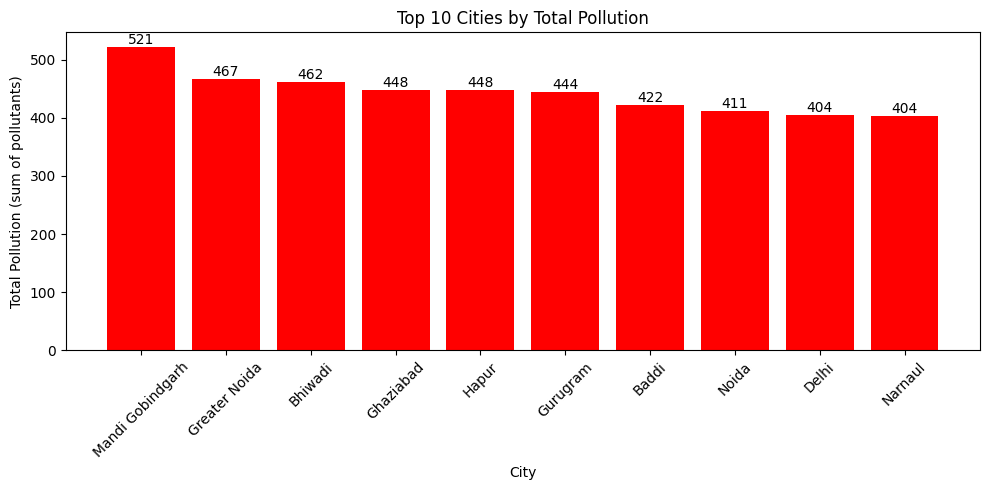

In [ ]:
plt.figure(figsize=(10,5))
bars = plt.bar(top10_cities.index, top10_cities['total_pollution'], color='Red')
plt.title('Top 10 Cities by Total Pollution')
plt.ylabel('Total Pollution (sum of pollutants)')
plt.xlabel('City')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


Noida, Gurugram and Delhi appear among the top polluted cities, indicating severe air quality issues compared to less industrial cities.

### Top 10 States by Average Levels of Each Air Pollutant




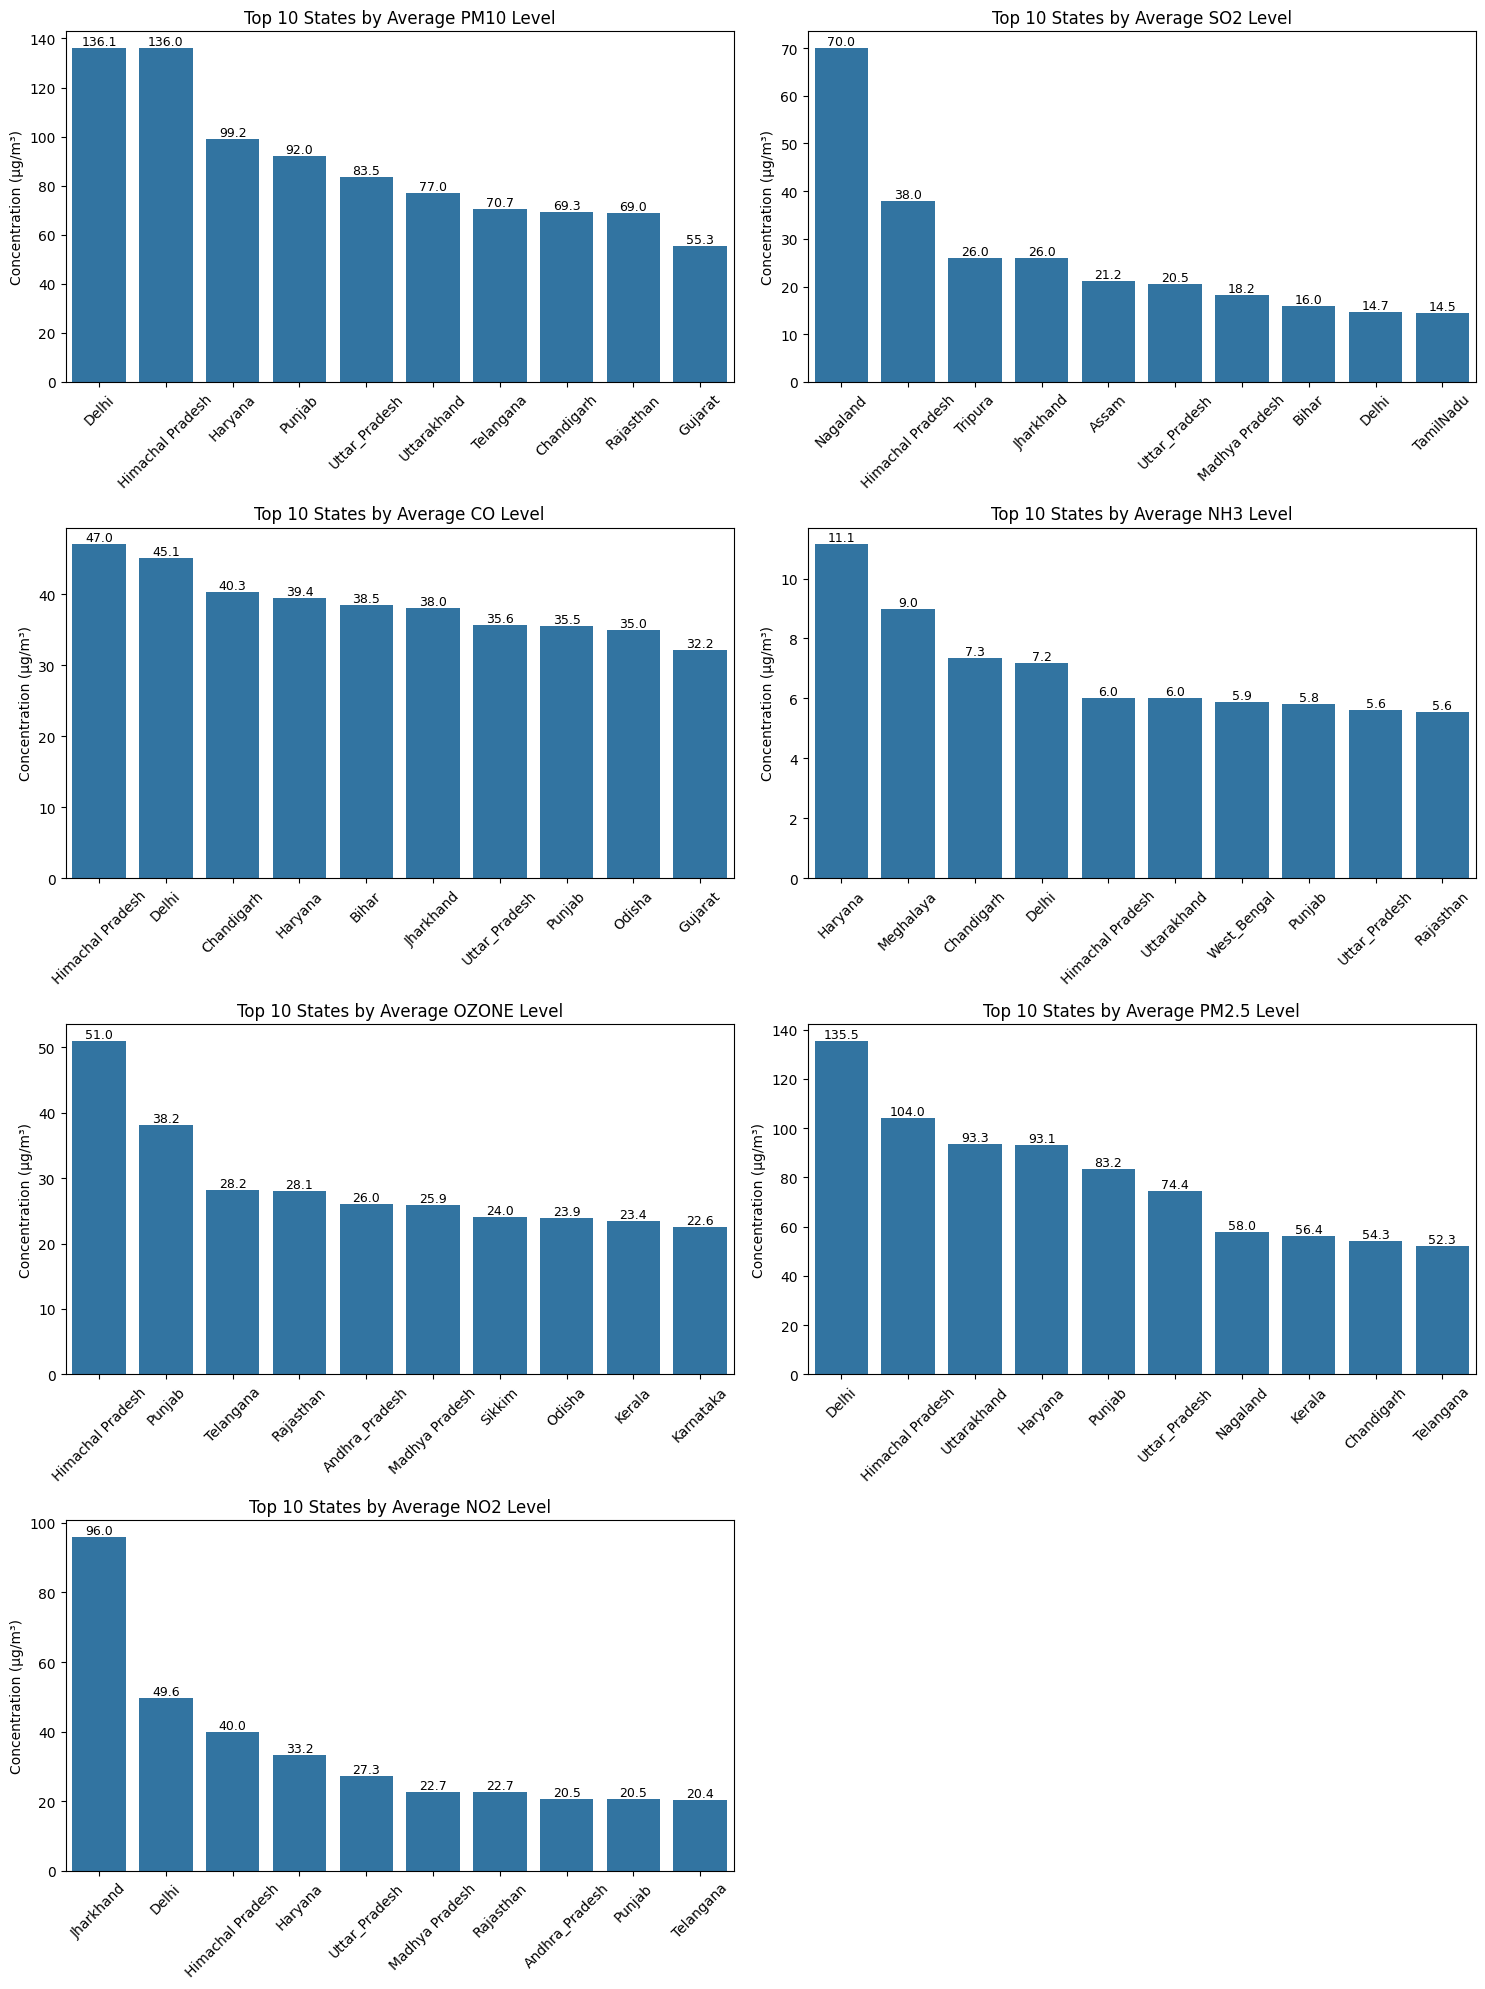

In [ ]:
state_pollutants = df_wide.groupby('state')[['PM10', 'SO2', 'CO', 'NH3', 'OZONE', 'PM2.5', 'NO2']].mean().reset_index()
pollutants = ['PM10', 'SO2', 'CO', 'NH3', 'OZONE', 'PM2.5', 'NO2']

plt.figure(figsize=(15, 20))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(4, 2, i)
    state_sorted = state_pollutants.sort_values(by=pollutant, ascending=False).head(10)

    ax = sns.barplot(data=state_sorted, x='state', y=pollutant, dodge=False)

    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.1f}',
                ha='center', va='bottom', fontsize=9)

    plt.title(f"Top 10 States by Average {pollutant} Level")
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Concentration (µg/m³)')

plt.tight_layout()
plt.show()


* Each pollutant shows a different set of states at the top, indicating that pollution sources vary geographically.






## Cluster Bar



### Top 10 Cities Pollutant levels

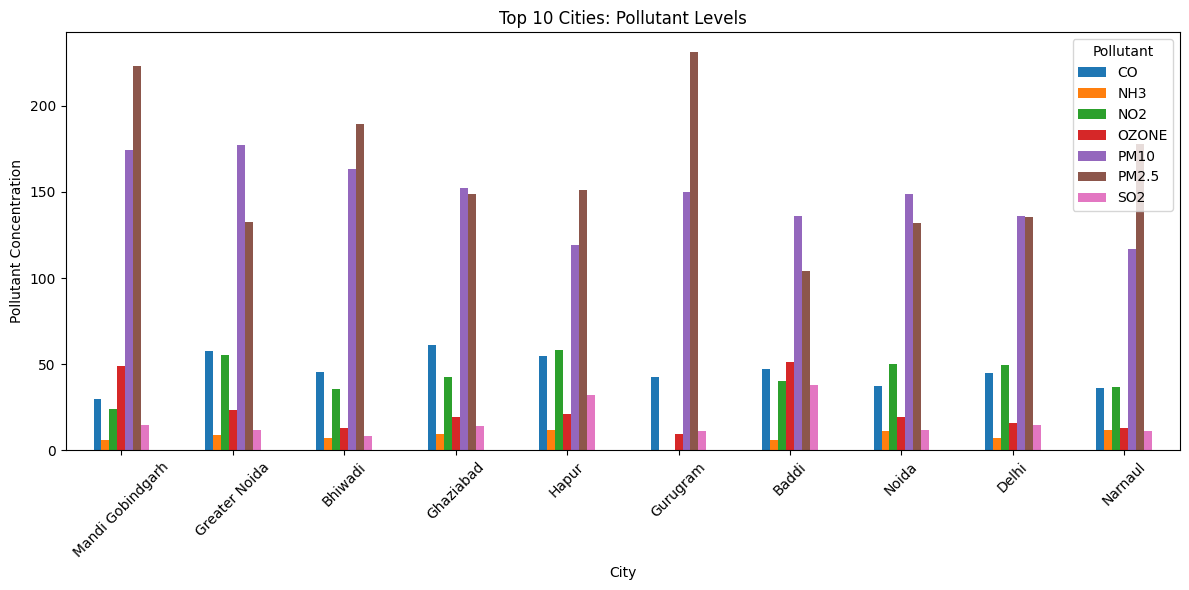

In [ ]:
top10_pollutants = top10_cities.drop(columns='total_pollution')
top10_pollutants.plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Cities: Pollutant Levels')
plt.ylabel('Pollutant Concentration')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.legend(title='Pollutant')
plt.tight_layout()
plt.show()

* This Cluster bar chart tells about contibution of each pollutant to total pollution in top 10 polluted cities of India.

* Most of the cities are effected by PM2.5 and PM10.

## Box Plot

### Boxplot of Pollutant Concentrations Across the Country

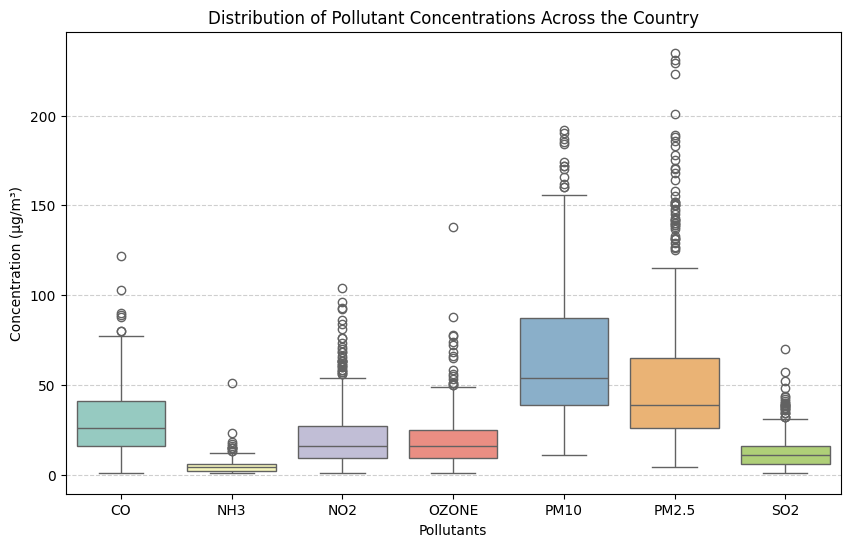

In [ ]:
pollutants = ['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2']

plt.figure(figsize=(10,6))
sns.boxplot(data=df_wide[pollutants], palette='Set3')
plt.title('Distribution of Pollutant Concentrations Across the Country')
plt.ylabel('Concentration (µg/m³)')
plt.xlabel('Pollutants')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


* This Box plot shows the distribution of major air pollutants across the country.

* PM10 and PM2.5 shows the widest spread and highest outliers, indicating reason for severe air quality issues in certain regions.

* SO2 and NH3 have relatively lowest spread.

* Almost all pollutants have skewed distributions with a large number of outliers. This tells that these peaks in certain areas can effect Air Quality of the country.

## Correlation Matrix

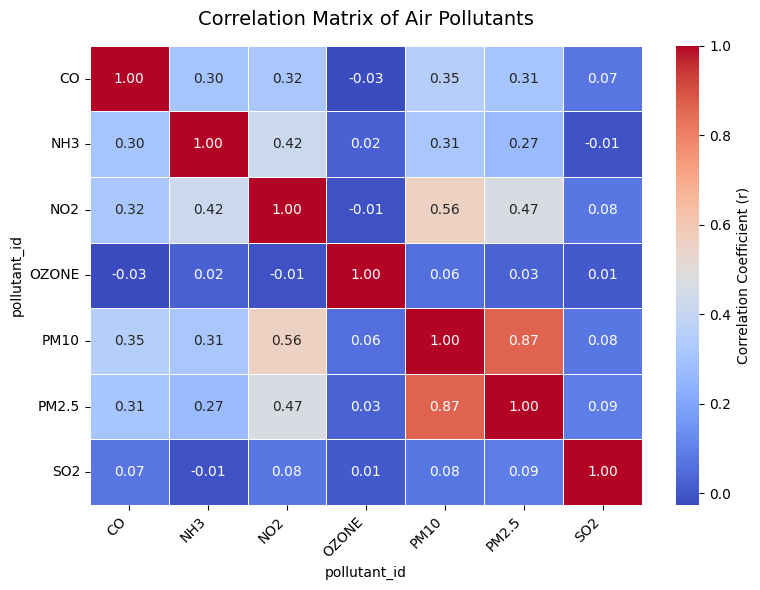

In [ ]:
pollutants = ['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2']
corr = df_wide[pollutants].corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient (r)'}
)

plt.title('Correlation Matrix of Air Pollutants', fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

* PM10 and PM2.5 are positively correlated.

* Hence, We can compare these pairs using Scatter plot to get better insights.

## Scatter Plot

### PM10 Vs PM2.5 Scatter Plot

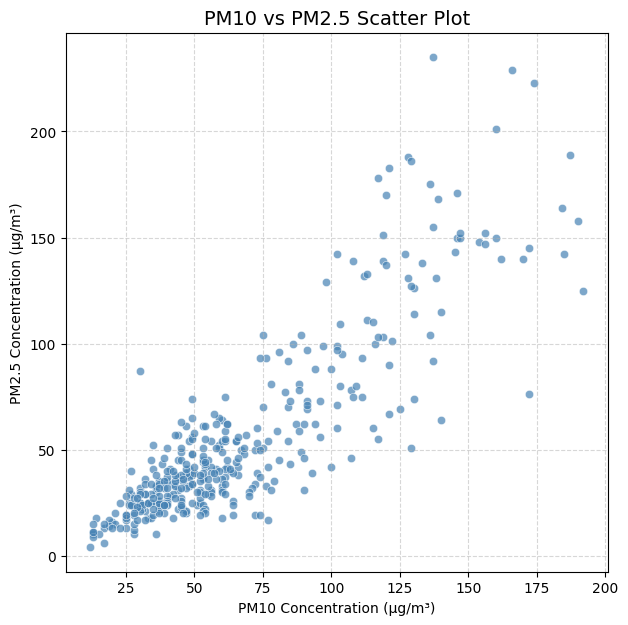

In [ ]:
df_pair = df_wide[['PM10', 'PM2.5']].dropna()
plt.figure(figsize=(7,7))
sns.scatterplot(data=df_pair, x='PM10', y='PM2.5', color='steelblue', alpha=0.7)
plt.title('PM10 vs PM2.5 Scatter Plot', fontsize=14)
plt.xlabel('PM10 Concentration (µg/m³)')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


* Most points form a diagonal trend from bottom-left to top-right, showing that PM10 and PM2.5 are directly proportional.

* Dense Cluster is at bottom left, indicating that most observations have low levels of PM2.5 and PM10 i.e, cleaner locations.

* There are no points where PM2.5 is high but PM10 is low i.e, in the bottom right. This aligns with physical reality which says PM2.5 ≤ PM10
